<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [3]:
path = './data_amazon/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


# Use spacy to clean stop words

In [7]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [9]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [11]:
df['token'] = df['reviews.text'].apply(get_lemmas)

# Gensim LDA Topic Modeling

In [14]:
# A dictionary representation of all the words in the corpus
id2word = corpora.Dictionary(df['token'])

In [15]:
# A bag of words(bow) representation of the corpus
corpus = [id2word.doc2bow(text) for text in df['token']]

In [26]:
# Instantiate the lda model
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 26,
                   passes=10,
                   workers=4
                  )

In [27]:
# Topics found
lda.print_topics()

[(6,
  '0.131*"battery" + 0.058*"brand" + 0.050*"good" + 0.041*"price" + 0.026*"long" + 0.026*"work" + 0.025*"great" + 0.024*"buy" + 0.023*"quality" + 0.020*"cheap"'),
 (16,
  '0.154*"battery" + 0.120*"long" + 0.082*"good" + 0.082*"life" + 0.078*"far" + 0.035*"last" + 0.026*"pretty" + 0.017*"work" + 0.015*"decent" + 0.010*"time"'),
 (14,
  '0.158*"use" + 0.152*"easy" + 0.080*"tablet" + 0.042*"nice" + 0.030*"great" + 0.024*"user" + 0.018*"friendly" + 0.018*"set" + 0.013*"fast" + 0.013*"want"'),
 (15,
  '0.118*"great" + 0.046*"tablet" + 0.046*"price" + 0.044*"buy" + 0.038*"good" + 0.030*"excellent" + 0.026*"deal" + 0.026*"fast" + 0.021*"item" + 0.021*"feature"'),
 (1,
  '0.067*"Kindle" + 0.041*"reader" + 0.028*"easy" + 0.027*"new" + 0.026*"read" + 0.026*"great" + 0.025*"love" + 0.024*"light" + 0.022*"e" + 0.022*"wife"'),
 (11,
  '0.179*"recommend" + 0.057*"highly" + 0.040*"definitely" + 0.040*"great" + 0.025*"product" + 0.019*"describe" + 0.012*"buy" + 0.010*"nephew" + 0.010*"love" + 0.0

# Interpret Results

In [28]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [29]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.189242  0.125403       1        1  9.114799
6     -0.263398 -0.036241       2        1  8.373449
21     0.071797  0.036818       3        1  8.002147
2      0.162019 -0.064249       4        1  7.519506
7      0.198965 -0.034570       5        1  5.197654
4      0.190683 -0.048625       6        1  5.013150
20     0.190055  0.036672       7        1  3.910487
12     0.029856  0.045247       8        1  3.849322
1      0.118593  0.035358       9        1  3.823139
18    -0.214012 -0.221381      10        1  3.574162
14     0.123346 -0.083583      11        1  3.435046
16    -0.275878  0.059696      12        1  3.247092
15     0.000126 -0.239787      13        1  3.096460
24    -0.063038 -0.176715      14        1  3.030821
5     -0.108854  0.040221      15        1  2.968392
22    -0.069593  0.191037      16        1  2.955548
13     0.046883  0.088525      17        1  2.654023
8      0.120558  0.015312      18        1  2.598902
25    -0.062903  0.115698      19        1  2.596068
0      0.138277  0.032311      20        1  2.449092
10    -0.019391  0.087410      21        1  2.272839
17    -0.100094 -0.088276      22        1  2.244225
23     0.068283  0.075554      23        1  2.113892
9     -0.054294  0.133478      24        1  2.107498
19    -0.010623 -0.012088      25        1  2.009187
11    -0.028123 -0.113224      26        1  1.843092, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
4     Default  9086.000000     battery  9086.000000  30.0000  30.0000
22    Default  8936.000000       great  8936.000000  29.0000  29.0000
19    Default  5126.000000       price  5126.000000  28.0000  28.0000
15    Default  2287.000000     product  2287.000000  27.0000  27.0000
11    Default  4214.000000        work  4214.000000  26.0000  26.0000
34    Default  6706.000000        good  6706.000000  25.0000  25.0000
3974  Default  7334.000000      tablet  7334.000000  24.0000  24.0000
33    Default  3339.000000        easy  3339.000000  23.0000  23.0000
24    Default  2487.000000        long  2487.000000  22.0000  22.0000
88    Default  5912.000000        love  5912.000000  21.0000  21.0000
92    Default  4784.000000         use  4784.000000  20.0000  20.0000
163   Default  1298.000000   recommend  1298.000000  19.0000  19.0000
20    Default  2086.000000       brand  2086.000000  18.0000  18.0000
222   Default   978.000000      charge   978.000000  17.0000  17.0000
2059  Default  1645.000000      screen  1645.000000  16.0000  16.0000
895   Default  2133.000000        read  2133.000000  15.0000  15.0000
1501  Default  1918.000000        book  1918.000000  14.0000  14.0000
2999  Default  1285.000000      kindle  1285.000000  13.0000  13.0000
100   Default  2216.000000        year  2216.000000  12.0000  12.0000
599   Default  2429.000000         old  2429.000000  11.0000  11.0000
59    Default  1093.000000        life  1093.000000  10.0000  10.0000
177   Default  1858.000000        game  1858.000000   9.0000   9.0000
188   Default  1266.000000         far  1266.000000   8.0000   8.0000
25    Default  3091.000000      Amazon  3091.000000   7.0000   7.0000
185   Default  2829.000000         kid  2829.000000   6.0000   6.0000
463   Default   984.000000       value   984.000000   5.0000   5.0000
5593  Default  1755.000000      Kindle  1755.000000   4.0000   4.0000
87    Default  1033.000000       light  1033.000000   3.0000   3.0000
47    Default  1165.000000     perfect  1165.000000   2.0000   2.0000
1890  Default  2346.000000         app  2346.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
2636  Topic26    23.881701  girlfriend    30.339087   3.7544  -5.5387
1370  Topic26    19.780611   attention    25.193924   3.7518  -5.7271
2259  Topic26    28.530

In [22]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = path
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [31]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=df['token'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

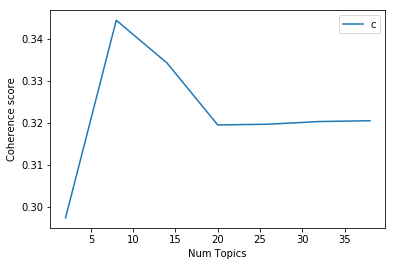

In [32]:
# Show graph
import matplotlib.pyplot as plt

limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling